      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

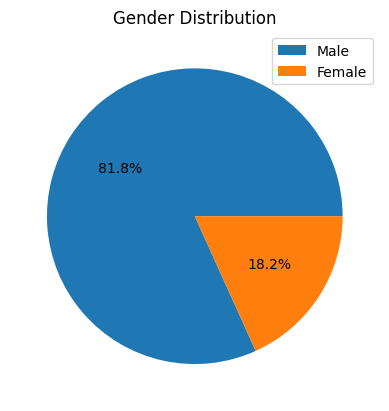

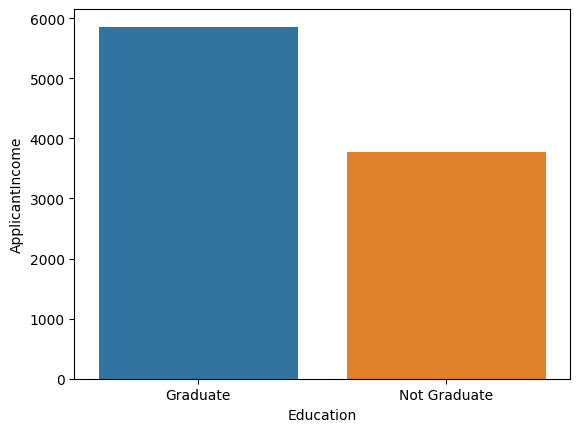

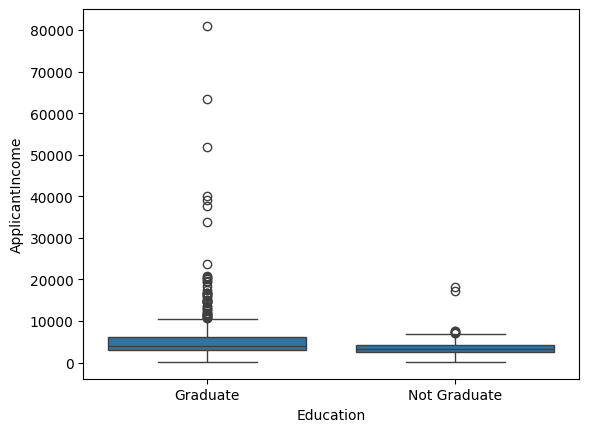

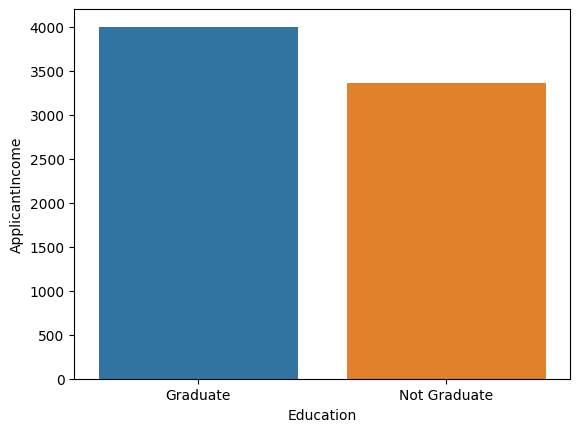

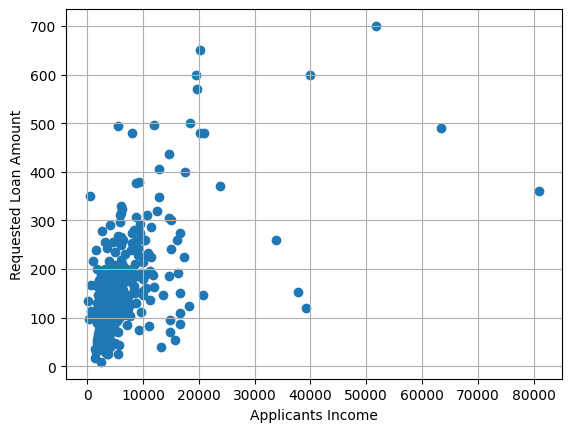

0.5656204566820268
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
12.297623130485675
accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94
Target on test data [1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1]


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

loan_train = pd.read_csv('dataset/loan-train.csv')
loan_test = pd.read_csv('dataset/loan-test.csv')


# ## Key Name	Description
# Loan_ID : Unique Loan ID
# 
# Gender : Male/ Female
# 
# Married	Applicant married (Y/N)
# 
# Dependents	Number of dependents
# 
# Education	Applicant Education (Graduate/ Under Graduate)
# 
# Self_Employed	Self-employed (Y/N)
# 
# ApplicantIncome	Applicant income
# 
# CoapplicantIncome	Coapplicant income
# 
# LoanAmount	Loan amount in thousands
# 
# Loan_Amount_Term	Term of a loan in months
# 
# Credit_History	credit history meets guidelines
# 
# Property_Area	Urban/ Semi-Urban/ Rural
# 
# Loan_Status	Loan approved (Y/N)

print(loan_train)

print("Rows: ", len(loan_train))
print("Columns: ", len(loan_train.columns))
print("Shape : ", loan_train.shape)

loan_train.describe()


# # Data Cleaning

loan_train.dtypes

def dataset_value_counts():
    for column in loan_train.columns:
        if loan_train[column].dtype == 'object':
            print('Unique values in {column} and their counts are: \n'.format(column = column), loan_train[column].value_counts())
            print('\n')


dataset_value_counts()


# # null values


loan_train[loan_train.isna().any(axis = 1)]


loan_train.isna().sum()


loan_train.info()


# # categorical variables with null values
# 1. Gender
# 2. Married
# 3. Dependents
# 4. Education
# 5. Self Employed
# 6. Credit History

loan_train['Gender'] = loan_train['Gender'].fillna(loan_train['Gender'].mode()[0])
loan_test['Gender'] = loan_test['Gender'].fillna(loan_test['Gender'].mode()[0])

loan_train['Dependents'] = loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0])
loan_test['Dependents'] = loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0])

loan_train['Married'] = loan_train['Married'].fillna(loan_train['Married'].mode()[0])
loan_test['Married'] = loan_test['Married'].fillna(loan_test['Married'].mode()[0])

loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0])
loan_test['Self_Employed'] = loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0])

loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])
loan_test['Credit_History'] = loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0])


loan_train[loan_train.isna().any(axis = 1)].shape


# # Quantitative variable with null values
# 1.Loan Amount
# 
# 2.Loan Amount Term

loan_train['LoanAmount'] = loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean())
loan_test['LoanAmount'] = loan_test['LoanAmount'].fillna(loan_train['LoanAmount'].mean())

loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean())
loan_test['Loan_Amount_Term'] = loan_test['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean())

loan_train[loan_train.isna().any(axis = 1)]


# # data visualisation

# Gender Distribution in data

gender_data = loan_train.Gender.value_counts()
fig, ax = plt.subplots()
ax.pie(gender_data  , autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.legend(['Male', 'Female'])
plt.show()
plt.close()


# # Relationship between income and education


Educationincome = loan_train.ApplicantIncome.groupby(loan_train['Education']).mean().reset_index()

sns.barplot(data = Educationincome, x = 'Education', y = 'ApplicantIncome', hue="Education")
plt.show()
plt.close()

sns.boxplot(data = loan_train, x = 'Education', y = 'ApplicantIncome')
plt.show()
plt.close()


Educationincomemedian = loan_train.ApplicantIncome.groupby(loan_train['Education']).median().reset_index()


sns.barplot(data = Educationincomemedian, x = 'Education', y = 'ApplicantIncome', hue="Education")
plt.show()
plt.close()


# # Correlation between Variables

loan_train_corr = loan_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status']]


loan_train



# # Correlation between Applicant income and Loan Amount

# In[26]:


plt.scatter(x = loan_train.ApplicantIncome, y = loan_train.LoanAmount)
plt.xlabel('Applicants Income')
plt.ylabel('Requested Loan Amount')
plt.grid()
plt.show()
plt.close()


from scipy.stats import pearsonr


corr_income_loanamount, p = pearsonr(loan_train.ApplicantIncome,loan_train.LoanAmount)
print(corr_income_loanamount)


# # Relationship between Property Area and Loan Status


prop_area_loan_status = pd.crosstab(loan_train.Property_Area, loan_train.Loan_Status)
print(prop_area_loan_status)



from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(prop_area_loan_status)
print(chi2)




# # Preprocessing


loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

loan_train.Education = loan_train.Education.replace({'Graduate': 1, 'Not Graduate' : 0})
loan_test.Education = loan_test.Education.replace({'Graduate': 1, 'Not Graduate' : 0})

loan_train.Dependents = loan_train.Dependents.replace({'3+' : 4})
loan_test.Dependents = loan_test.Dependents.replace({'3+' : 4})


train_dataset = loan_train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]



test_dataset = loan_test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]


train_dataset = pd.get_dummies(train_dataset, columns = ['Property_Area'])
train_dataset = train_dataset.replace({True: 1, False: 0})



test_dataset = pd.get_dummies(test_dataset, columns = ['Property_Area'])
test_dataset = test_dataset.replace({True: 1, False: 0})


# # Machine Learning Model


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


logistic_model = LogisticRegression()


# # Training the Model


train_features = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

x_train = train_dataset[train_features].values
y_train = train_dataset['Loan_Status'].values.astype('int')

x_test = test_dataset[train_features].values

x_train_scaled = MinMaxScaler().fit_transform(x_train)
x_test_scaled = MinMaxScaler().fit_transform(x_test)

logistic_model.fit(x_train_scaled, y_train)


# # Testing the Model


predicted = logistic_model.predict(x_test_scaled)

score = logistic_model.score(x_train_scaled, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 



